In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset = pd.read_csv("sample_data/data_47genes_AD_final_03_11_2022.csv")

In [4]:
dataset

,ID,1553613_s_at,1554096_a_at,1554565_x_at,1555318_at,1555862_s_at,1559044_at,1559402_a_at,1559419_at,1562110_at,...,230629_s_at,233700_at,234163_at,236645_at,239179_at,241762_at,242239_at,36711_at,49452_at,Class
0,GSM119615,6.203832,5.050857,6.066802,5.813904,4.370841,5.280544,4.292702,7.322636,3.361006,...,6.986287,2.559149,7.219780,5.648042,6.648204,7.080622,10.228519,7.861206,8.566214,0
1,GSM119616,7.195632,2.014707,5.802166,5.580658,6.483879,5.665899,5.593581,7.305678,4.679912,...,8.195065,5.751678,8.297986,5.217721,6.609696,6.614370,9.580553,7.829819,7.789636,0
2,GSM119617,9.124808,5.397589,7.855552,6.962150,7.825258,7.319590,8.175863,9.004129,5.132397,...,9.456128,5.155799,8.064157,5.479654,6.114379,8.850493,9.771354,7.408378,9.017066,0
3,GSM119618,9.974537,4.896467,7.761095,7.000410,8.661833,7.351857,6.786634,9.862468,3.948449,...,9.093344,7.032424,8.920659,6.016358,7.338708,7.804063,9.857896,8.069383,8.822903,0
4,GSM119619,7.701660,7.519224,8.033789,6.360396,3.947169,7.300039,9.123777,8.417786,6.704256,...,9.682660,7.943021,9.661385,7.651845,8.511342,7.603034,10.569964,9.690173,9.000217,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,GSM238951,5.621730,5.694797,5.250124,5.190433,4.781800,4.564781,7.829241,7.787178,4.036829,...,8.767012,7.061387,8.464681,5.548665,7.381275,8.532913,9.330200,8.665851,8.465309,1
157,GSM238952,8.318538,8.170105,7.590198,6.502288,5.771207,6.640896,8.163710,8.388164,7.041451,...,10.026330,7.663152,8.775225,5.905820,8.552623,10.104009,10.619505,10.144493,9.978610,1
158,GSM238953,6.905916,5.563167,6.747361,4.826645,6.027497,5.471623,6.737308,8.097790,3.997049,...,8.867106,6.309080,6.997270,5.735482,7.885904,7.777985,9.350380,8.296572,8.781950,1
159,GSM238955,12.324847,8.780061,6.092992,8.595153,6.610619,6.162971,10.685905,9.300131,7.373979,...,10.225364,6.853584,9.687582,7.622952,10.894590,10.430296,10.365393,10.266318,10.810065,1


In [5]:
dataset.shape

(161, 49)

In [6]:
dataset=dataset.drop(['ID'],1)##delete the the ID column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
dataset.to_csv('data_CKD.csv', index=False)

In [7]:
X = dataset.drop('Class', 1)
y = dataset['Class']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# 1. Forward selection

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['hemo', 'sg', 'dm', 'sc', 'al', 'htn', 'appet']

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=6,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_

('sg', 'al', 'sc', 'hemo', 'htn', 'dm')

In [ ]:
# 2. Backward elimination

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [ ]:
backward_elimination(X,y)

['sg', 'al', 'sc', 'hemo', 'htn', 'dm', 'appet']

In [ ]:
sbs = SFS(LinearRegression(),
         k_features=24,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X,y)
sbs.k_feature_names_

('age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane')

In [ ]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,24),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, y)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=(3, 24),
                          n_jobs=1, pre_dispatch='2*n_jobs', scoring=None,
                          verbose=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


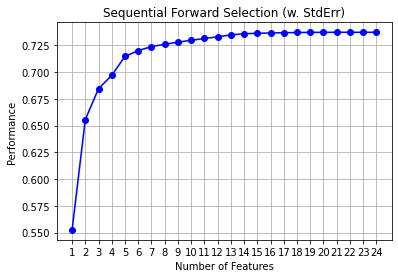

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
# 3. Bi-directional elimination(Step-wise Selection)

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
          break
    return best_features

In [ ]:
stepwise_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['hemo', 'sg', 'dm', 'sc', 'al', 'htn', 'appet']

In [ ]:
sffs = SFS(LinearRegression(),
         k_features=(3,24),
         forward=True,
         floating=False,
         cv=0)
sffs.fit(X, y)
sffs.k_feature_names_

('age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane')

In [9]:
# Lasso regression

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [11]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [13]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [14]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.135 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.098 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.079 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.116 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.168 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.159 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.139 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.125 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.152 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.184 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.197 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [15]:
search.best_params_

{'model__alpha': 0.1}

In [16]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [17]:
importance = np.abs(coefficients)
importance

array([0.        , 0.0002858 , 0.        , 0.        , 0.        ,
       0.        , 0.0462988 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01542206, 0.        , 0.0149915 ,
       0.        , 0.02815685, 0.        , 0.        , 0.        ,
       0.20610799, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [21]:
features = dataset.columns[:-1]
np.array(features)[importance > 0]

array(['1554096_a_at', '1559402_a_at', '217028_at', '220370_s_at',
       '220796_x_at', '225239_at'], dtype=object)

In [25]:
np.array(features)[importance >0]

array(['1554096_a_at', '1559402_a_at', '217028_at', '220370_s_at',
       '220796_x_at', '225239_at'], dtype=object)